<table>
<tr style="background-color:#FFFFFF;">
<td width=15%>
    <table>
        <tr><img src="Fig/Ensimag.png"></img>
        </tr>
    </table>
</td>
<td>
    <table>
        <tr><center><h1>Optimisation Numérique - TP3</h1></center>
        </tr>
        <tr><center><h2>Proximal Algorithms (2 x 1.5h)</h2></center>
        </tr>
    </table>
</td>
<td width=15%>
    <table>
        <tr><a href="https://ljk.imag.fr/membres/Jerome.Malick/teaching.html" style="font-size: 16px; font-weight: bold">Jérôme Malick </br></a>
        </tr>   
        <tr><a href="http://grishchenko.org" style="font-size: 16px; font-weight: bold">Dmitri Grishenko <br></a>
        </tr>
        <tr><a href="https://yassine-laguel.github.io/teaching/" style="font-size: 16px; font-weight: bold">Yassine Laguel </br></a>
        </tr>
    </table>
</td>
</tr>
</table>

# Structure of an optimization program

An optimization program can be practically divided into three parts:
* the *run* environment, in which you test, run your program, and display results.
* the *problem* part, which contains the function oracles, problem constraints, etc.
* the *algorithmic* part, where the algorithms are coded.

The main interest of such division is that these parts are interchangeable, meaning that, for instance, the algorithms of the third part can be used of a variety of problems. That is why such a decomposition is widely used.

In the present lab, you will use this division:
* `TP3_Proximal_algorithms.ipynb` will be the *run* environment
* `logistic_regression.ipynb` will be the considered *logistic regression problem* for this lab
* `algoProx.ipynb` will contain the proximal *algorithms* studied in this lab

---

The following script will allow you to import *notebooks* as if you imported *python files* and will have to be executed at each time you launch Jupyter notebooks.

In [1]:
import start
from imp import reload

---

# Composite minimization for machine learning.

In this lab, we will investigate optimization algorithms over composite functions composed of a smooth and a non-smooth part using the proximal gradient algorithm over a practical problem of machine learning: binary classification using logistic regression.</br>

> Read the file `logistic_regression_2.ipynb` contains the problem explanation and simulators. 

> Implement the proximal operation linked to $\ell_1$ norm in the regularization. 

> Implement the proximal gradient algorithm in the file `algoProx.ipynb` and test you algorithm below.


In [2]:
import algoProx             # load our algoProx module (from notebook)
reload(algoProx)            # reload the module if changed (and saved)
from algoProx import *      # import all methods of the module into the current environment

import numpy as np
import logistic_regression_2 as pb
reload(pb)

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 1000                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

##### gradient algorithm
x,x_tab = proximal_gradient_algorithm(pb.F , pb.f_grad , pb.g_prox , x0 , step , PREC, ITE_MAX , True)



importing notebook from algoProx.ipynb
importing notebook from algoProx.ipynb
importing notebook from logistic_regression_2.ipynb
importing notebook from logistic_regression_2.ipynb
------------------------------------
 Proximal gradient algorithm
------------------------------------
START    -- stepsize = 0.030334772813507393
FINISHED -- 999 iterations / 1.789112s -- final value: 0.438712




> Investigate the decrease of the algorithm.

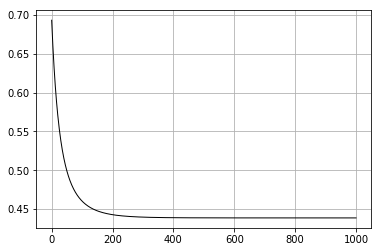

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

F = []
for i in range(x_tab.shape[0]):
    F.append( pb.F(x_tab[i])) 

plt.figure()
plt.plot( F, color="black", linewidth=1.0, linestyle="-")
plt.grid(True)
plt.show()

> Plot, with the following command, the support of the vector $x_k$ (i.e. one point for every non-null coordinate of $x_k$) versus the iterations. 

> What do yo notice? Was it expected?

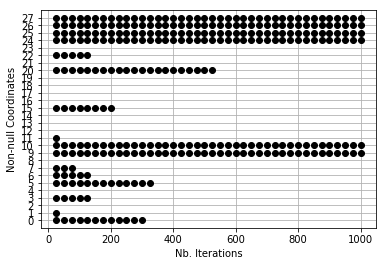

In [4]:
plt.figure()

for i in np.arange(0,x_tab.shape[0],int(x_tab.shape[0]/40)):
    for j in range(pb.n):
        if np.abs(x_tab[i,j])>1e-14:
            plt.plot( i , j  , 'ko')

plt.grid(True)
plt.ylabel('Non-null Coordinates')
plt.xlabel('Nb. Iterations')
plt.ylim(-1,pb.d+1)
plt.yticks(np.arange(0,pb.d+1))
plt.show()

---

# Regularization path.


We saw above that the algorithm *selected* some coordinates as the other get to zero. Considering our machine learning task (see `logistic_regression_2.ipynb`), this translates into the algorithm selecting a subset of the features that will be used for the prediction step.  

> Change the parameter $\lambda_1$ of the problem (`pb.lam1`) in the code above and investigate how it influences the number of selected features.

In order to quantify the influence of this feature selection, let us consider the *regularization path* that is the support of the final points obtained by our minimization method versus the value of $\lambda_1$.

> For $\lambda_1 = 2^{-12},2^{-11}, .. , 2^{1}$, run the proximal gradient algorithm on the obtained problem and store the support of the final point, the prediction performance on the *training set* (`pb.prediction_train`) and on the *testing set* (`pb.prediction_test`).

In [15]:
import matplotlib.pyplot as plt
% matplotlib inline

import algoProx             # load our algoProx module (from notebook)
reload(algoProx)            # reload the module if changed (and saved)
from algoProx import *      # import all methods of the module into the current environment

import numpy as np
import logistic_regression_2 as pb
reload(pb)

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 500                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

reg_l1_tab = np.power( 2.0, np.array(range(-12,2)) )
pb.lam2 = 1e-1

final_point = np.copy(x0)
prediction_train = np.zeros(14)
prediction_test = np.zeros(14)
### TODO

for i in reg_l1_tab:
    pb.lam1 = i
    x,x_tab = proximal_gradient_algorithm(pb.F , pb.f_grad , pb.g_prox , x0 , step , PREC, ITE_MAX , True)
    suppx = []
    '''for j in x:
        if(np.abs(j)>1e-14):
            suppx = np.hstack((suppx,j))
            final_point = np.vstack((final_point,suppx))'''
    final_point = np.vstack((final_point,x))
    prediction_train = np.vstack((prediction_train,pb.prediction_train(x,False)))
    prediction_test = np.vstack((prediction_test,pb.prediction_test(x,False)))

    

importing notebook from algoProx.ipynb
importing notebook from logistic_regression_2.ipynb
------------------------------------
 Proximal gradient algorithm
------------------------------------
START    -- stepsize = 0.03024303126524509
FINISHED -- 499 iterations / 0.877412s -- final value: 0.363559




ValueError: all the input array dimensions except for the concatenation axis must match exactly

> Plot the *regularization path* and look at the feature signification (file `student.txt` or `logistic_regression_2.ipynb`) to see which are the most important features of the dataset.

In [ ]:
# TODO

> Plot the *training* and *testing* accuracies versus the value of $\lambda_1$.

In [ ]:
# TODO